In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import itertools



### Spotify Dataset

In [36]:
# Normalize the data
# scaler = StandardScaler()
# normalized_features = scaler.fit_transform(features)

# # Split into training and test sets
# X_train, X_test = train_test_split(normalized_features, test_size=0.2, random_state=30)

##### Spotify Dimension Reduction using PCA


In [37]:
# Load dataset
spotify_data = pd.read_csv('Input_data/cleaned_spotify_data.csv')


In [38]:
selected_features = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists', 
            'in_deezer_playlists', 'in_apple_playlists','artist_count', 'released_year']

In [39]:
#Extract selected features
spotify_selected_df = spotify_data[selected_features]

In [40]:
# Standardize the data
scaler = StandardScaler()
spotify_selected_scaled = scaler.fit_transform(spotify_selected_df)

spotify_train, spotify_test = train_test_split(spotify_selected_scaled, test_size=0.2, random_state=30)

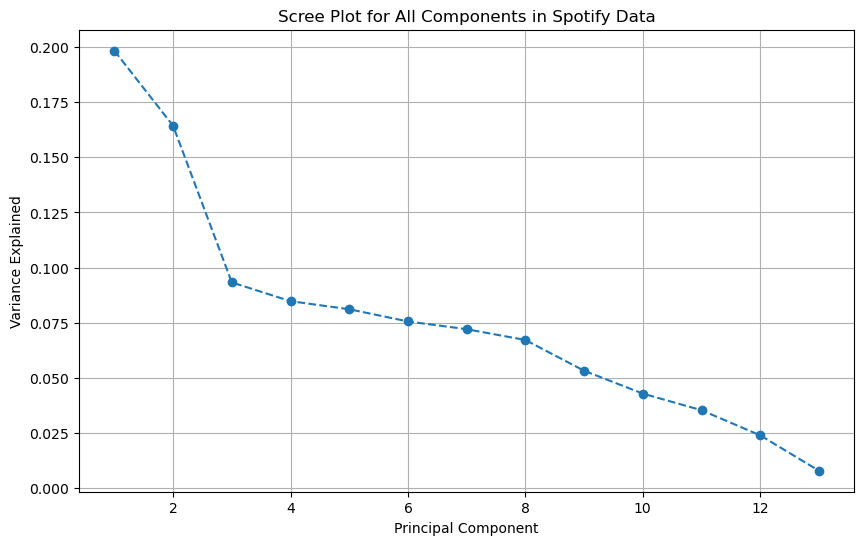

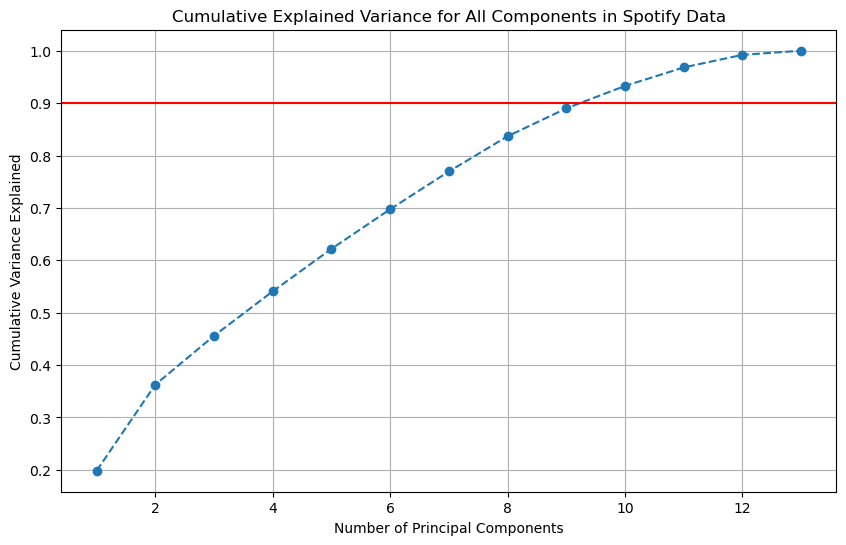

In [41]:
# Apply PCA
pca_selected = PCA()
spotify_pca_selected_transformed = pca_selected.fit_transform(spotify_train)

# Explained variance ratio
explained_variance_selected = pca_selected.explained_variance_
explained_variance_selected = pca_selected.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_selected) + 1), explained_variance_selected, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot for All Components in Spotify Data')
plt.grid()
plt.show()

# Cumulative Explained Variance
cumulative_variance_selected = np.cumsum(explained_variance_selected)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_selected) + 1), cumulative_variance_selected, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance for All Components in Spotify Data')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='-')
plt.show()

In [42]:
# # Scree Plot
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(explained_variance_selected) + 1), explained_variance_selected, marker='o', linestyle='--')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.title('Scree Plot (Selected Features)')
# plt.grid()
# plt.show()

In [43]:
# # Create a biplot function
# def biplot(score, coeff, labels=None):
#     plt.figure(figsize=(10, 7))
#     plt.scatter(score[:, 0], score[:, 1], alpha=0.5)
#     for i in range(coeff.shape[0]):
#         plt.arrow(0, 0, coeff[i, 0]*2, coeff[i, 1]*2, color='r', alpha=0.5)
#         if labels is None:
#             plt.text(coeff[i, 0]*2.5, coeff[i, 1]*2.5, "Var" + str(i+1), color='g', ha='center', va='center')
#         else:
#             plt.text(coeff[i, 0]*2.5, coeff[i, 1]*2.5, labels[i], color='g', ha='center', va='center')
#     plt.xlabel("PC1")
#     plt.ylabel("PC2")
#     plt.title("PCA Biplot")
#     plt.grid()

# # Call the biplot function
# biplot(spotify_pca_selected_transformed, np.transpose(pca_selected.components_[:2, :]), labels=spotify_selected_df.columns)


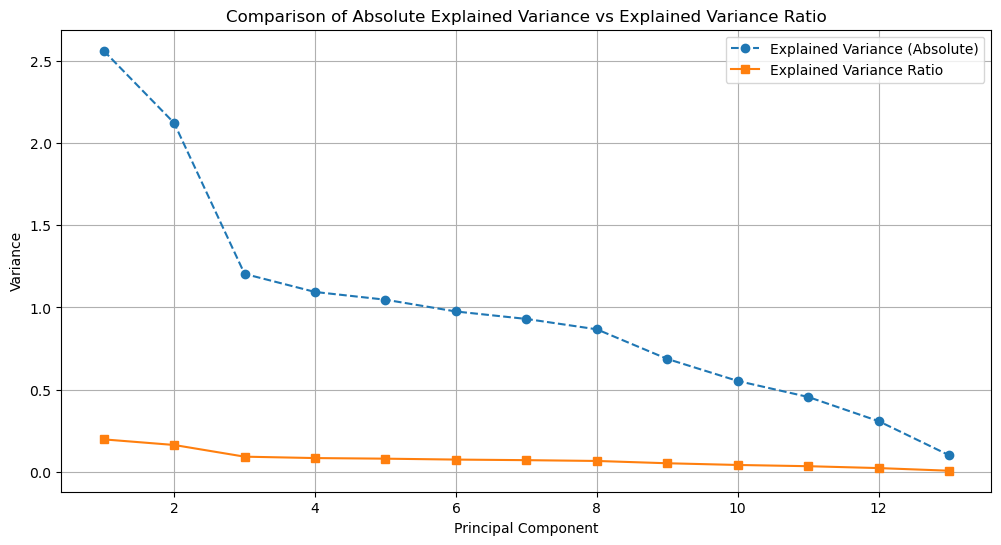

In [44]:
# Extract explained variance (absolute) and explained variance ratio (proportion)
explained_variance_abs = pca_selected.explained_variance_
explained_variance_ratio = pca_selected.explained_variance_ratio_

# Create a comparison plot
plt.figure(figsize=(12, 6))

# Plot absolute explained variance
plt.plot(range(1, len(explained_variance_abs) + 1), explained_variance_abs, marker='o', linestyle='--', label='Explained Variance (Absolute)')

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='s', linestyle='-', label='Explained Variance Ratio')

plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Comparison of Absolute Explained Variance vs Explained Variance Ratio')
plt.legend()
plt.grid()
plt.show()


In [45]:
# # visualize the principal components
# plt.scatter(spotify_pca_selected_transformed[:, 0], spotify_pca_selected_transformed[:, 1])
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.title('Scatter Plot of Principal Components')
# plt.grid()

# plt.show()


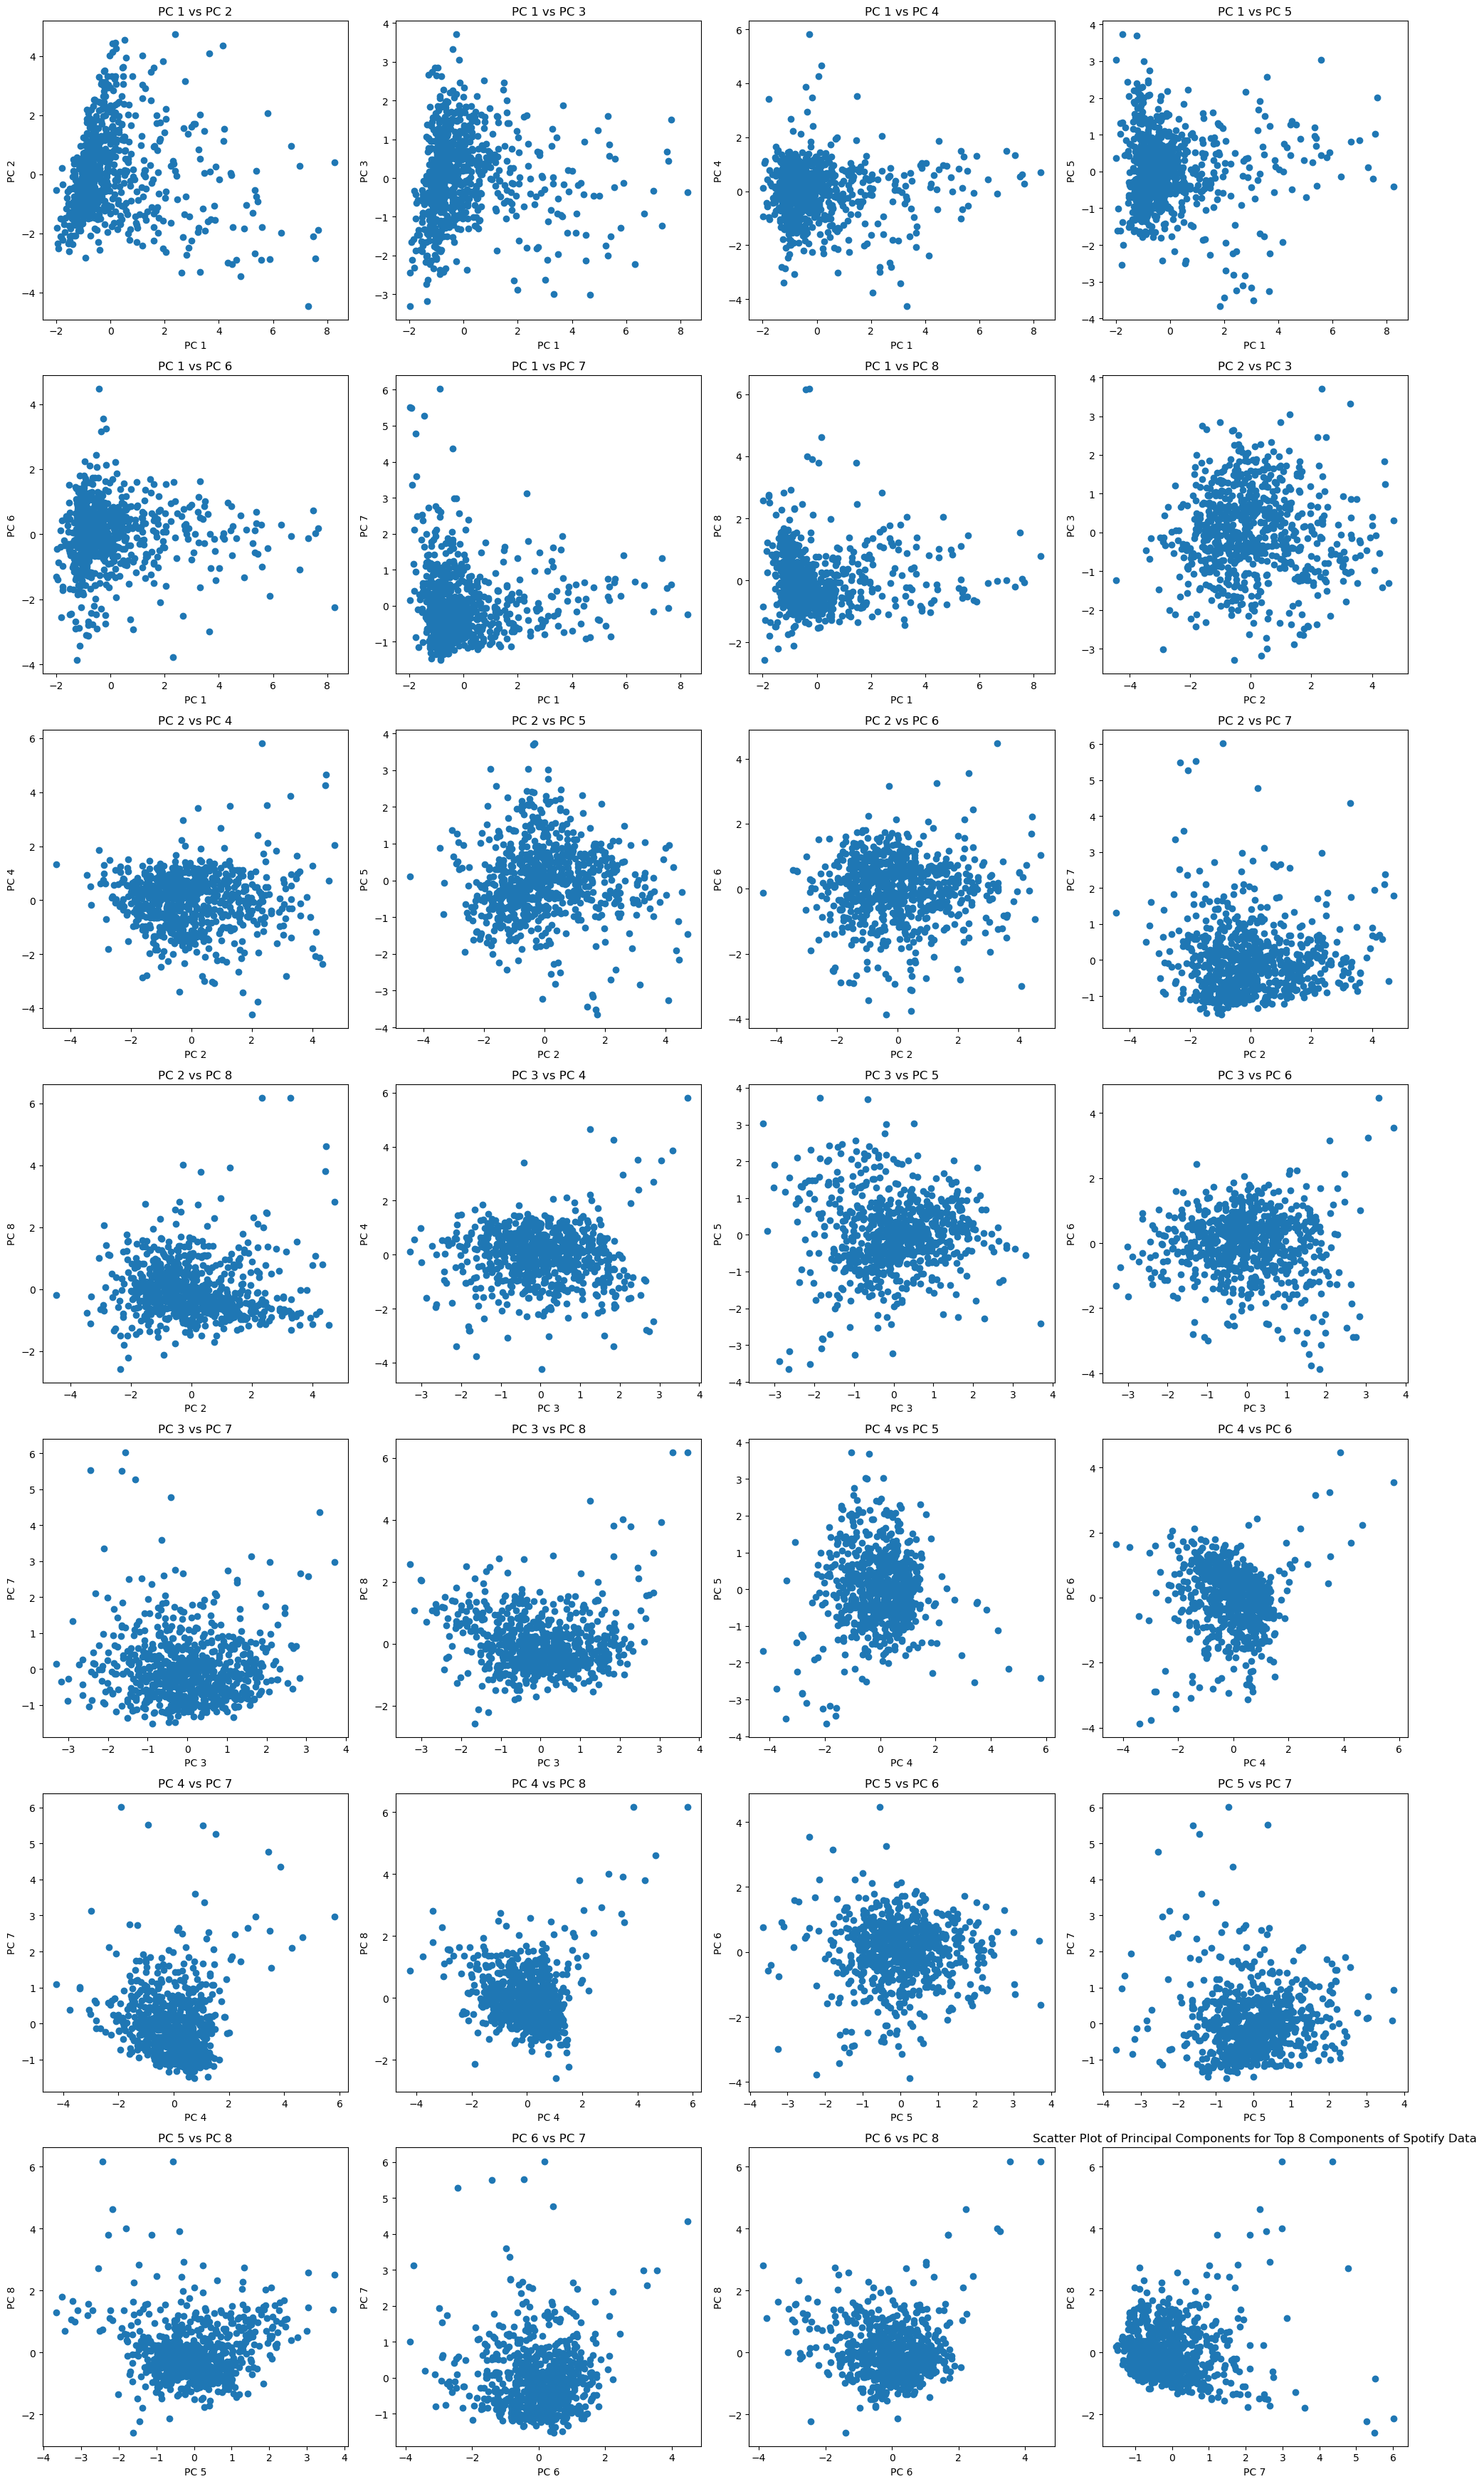

In [46]:
# visualize the principal components

rows = 7
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten axes for easy iteration (handles both 1D and 2D cases)
axes = np.array(axes).flatten()
index = 0

### We are cutting off the PCA components to 8 to avoid cluttering the plot

for i in range(0, 8):
    for j  in range(i+1, 8):
        ax = axes[index]
        ax.scatter(spotify_pca_selected_transformed[:, i], spotify_pca_selected_transformed[:, j])
        ax.set_xlabel('PC '+str(i+1))
        ax.set_ylabel('PC '+str(j+1))
        ax.set_title(f'PC {i+1} vs PC {j+1}')

        index += 1
    
plt.tight_layout()
plt.title('Scatter Plot of Principal Components for Top 8 Components of Spotify Data') 
plt.show()

# # plt.scatter(spotify_pca_selected_transformed[:, 0], spotify_pca_selected_transformed[:, 1])
# # plt.xlabel('PC 1')
# # plt.ylabel('PC 2')
# plt.title('Scatter Plot of Principal Components')
# # plt.grid()

# plt.show()


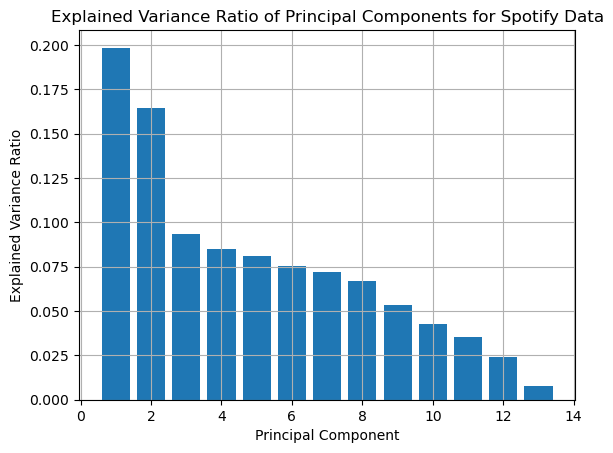

In [47]:
#PLot the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components for Spotify Data')
plt.grid()
plt.show()

*Findings*

Essentially we see that PC1 and PC2 carry the most weight so the variables that make up those components carry the most weight as well.




In [48]:
#create a dataframe for feature contributions
feature_contributions_selected_df  = pd.DataFrame(pca_selected.components_, columns=selected_features)


In [49]:

# Compute the absolute contributions of each feature to the first three principal components
top_features_pc1_selected = feature_contributions_selected_df.iloc[0].abs().sort_values(ascending=False)
top_features_pc2_selected = feature_contributions_selected_df.iloc[1].abs().sort_values(ascending=False)
top_features_pc3_selected = feature_contributions_selected_df.iloc[2].abs().sort_values(ascending=False)
top_features_pc4_selected = feature_contributions_selected_df.iloc[3].abs().sort_values(ascending=False)


In [50]:
print(top_features_pc1_selected)
print(top_features_pc2_selected)
print(top_features_pc3_selected)
print(top_features_pc4_selected)

in_spotify_playlists    0.573660
in_deezer_playlists     0.501092
in_apple_playlists      0.454598
released_year           0.348331
danceability_%          0.184218
speechiness_%           0.146575
artist_count            0.130407
energy_%                0.087967
valence_%               0.085087
acousticness_%          0.051828
liveness_%              0.040767
bpm                     0.008340
instrumentalness_%      0.002213
Name: 0, dtype: float64
energy_%                0.523695
acousticness_%          0.457714
valence_%               0.407485
danceability_%          0.399559
artist_count            0.224193
in_apple_playlists      0.189614
instrumentalness_%      0.171732
in_spotify_playlists    0.157882
in_deezer_playlists     0.153429
speechiness_%           0.113503
liveness_%              0.086144
released_year           0.076640
bpm                     0.014078
Name: 1, dtype: float64
speechiness_%           0.439368
acousticness_%          0.421595
danceability_%          0.37

##### Reduce the number of Features for SPotify




In [51]:
# Define a stricter threshold for low contribution
low_contribution_threshold = 0.30  

# Identify features with consistently low contributions across the first 4 PCs
low_contributing_features = feature_contributions_selected_df.iloc[:4].abs().max().sort_values()
features_to_remove = low_contributing_features[low_contributing_features < low_contribution_threshold]

# List of features to retain
features_to_keep = [feature for feature in selected_features if feature not in features_to_remove.index]


In [52]:
print(features_to_remove)

print('features to keep:' + str(features_to_keep))


artist_count    0.22849
dtype: float64
features to keep:['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists', 'released_year']


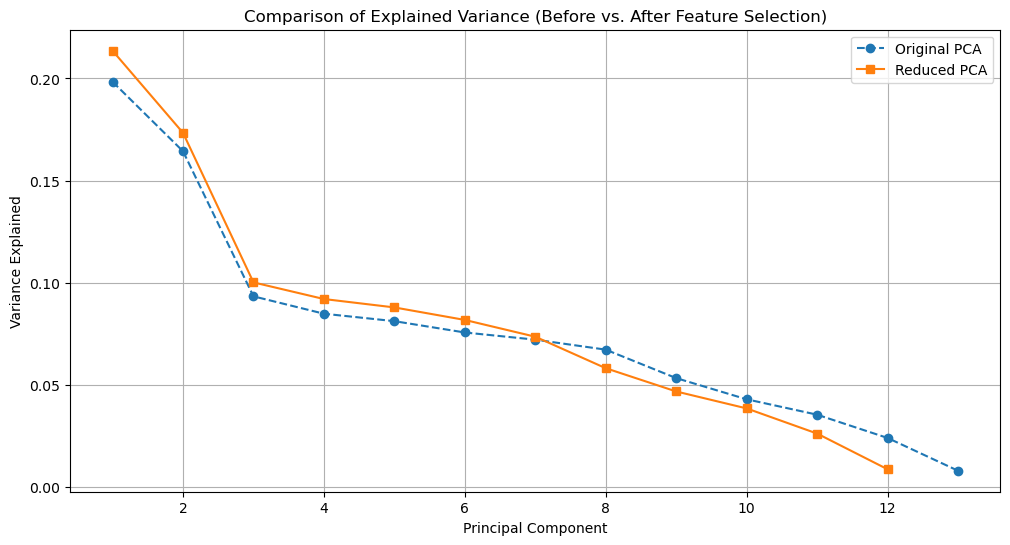

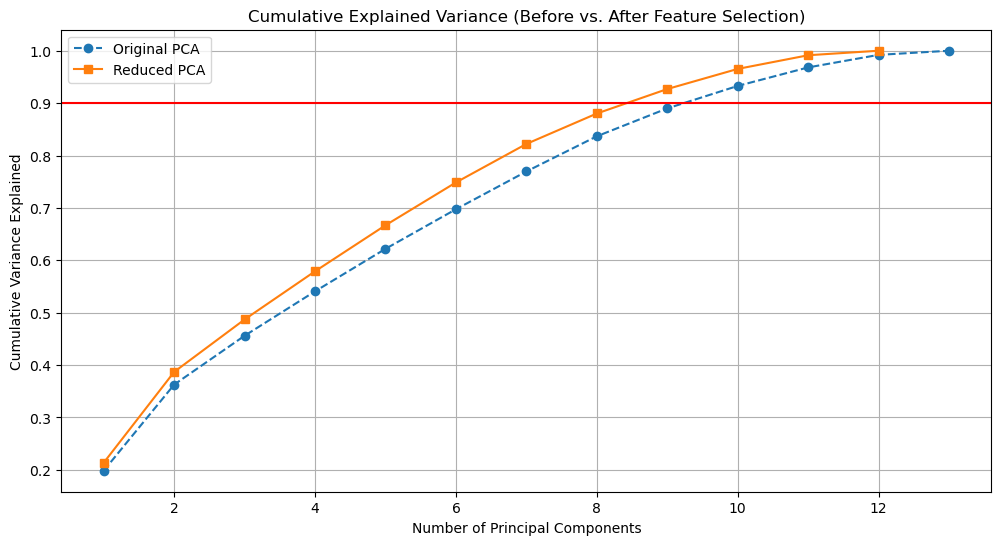

In [53]:
# Extract only the retained features for PCA
spotify_reduced_df = spotify_selected_df[features_to_keep]

# Standardize the reduced dataset
spotify_reduced_scaled = scaler.fit_transform(spotify_reduced_df)

# Split the reduced dataset into training and test sets
spotify_reduced_train, spotify_reduced_test = train_test_split(spotify_reduced_scaled, test_size=0.2, random_state=30)

# Apply PCA on reduced dataset
pca_reduced = PCA()
spotify_pca_reduced_transformed = pca_reduced.fit_transform(spotify_reduced_train)

# Extract explained variance for comparison
explained_variance_original = pca_selected.explained_variance_ratio_
explained_variance_reduced = pca_reduced.explained_variance_ratio_

# Create a comparison plot for explained variance
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(explained_variance_original) + 1), explained_variance_original, marker='o', linestyle='--', label='Original PCA')
plt.plot(range(1, len(explained_variance_reduced) + 1), explained_variance_reduced, marker='s', linestyle='-', label='Reduced PCA')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Comparison of Explained Variance (Before vs. After Feature Selection)')
plt.legend()
plt.grid()
plt.show()

# Compute cumulative variance for both cases
cumulative_variance_original = np.cumsum(explained_variance_original)
cumulative_variance_reduced = np.cumsum(explained_variance_reduced)

# Plot cumulative explained variance
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(cumulative_variance_original) + 1), cumulative_variance_original, marker='o', linestyle='--', label='Original PCA')
plt.plot(range(1, len(cumulative_variance_reduced) + 1), cumulative_variance_reduced, marker='s', linestyle='-', label='Reduced PCA')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance (Before vs. After Feature Selection)')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.legend()
plt.grid()
plt.show()


### ICA Analysis


#### Code from TA Office Hours

In [54]:
spotify_selected_df.head()
features = ['bpm', 'energy_%','danceability_%']
spotify_ICA_inputs = spotify_selected_df[features]


In [55]:
scaler = StandardScaler()
spotify_ICA_scaled = scaler.fit_transform(spotify_ICA_inputs)

# Split the dataset into training and test sets
spotify_ICA_train, spotify_ICA_test = train_test_split(spotify_ICA_scaled, test_size=0.2, random_state=30)

# Apply PCA
spotify_ICA = FastICA(n_components=2)
independent_components = spotify_ICA.fit_transform(spotify_ICA_train)


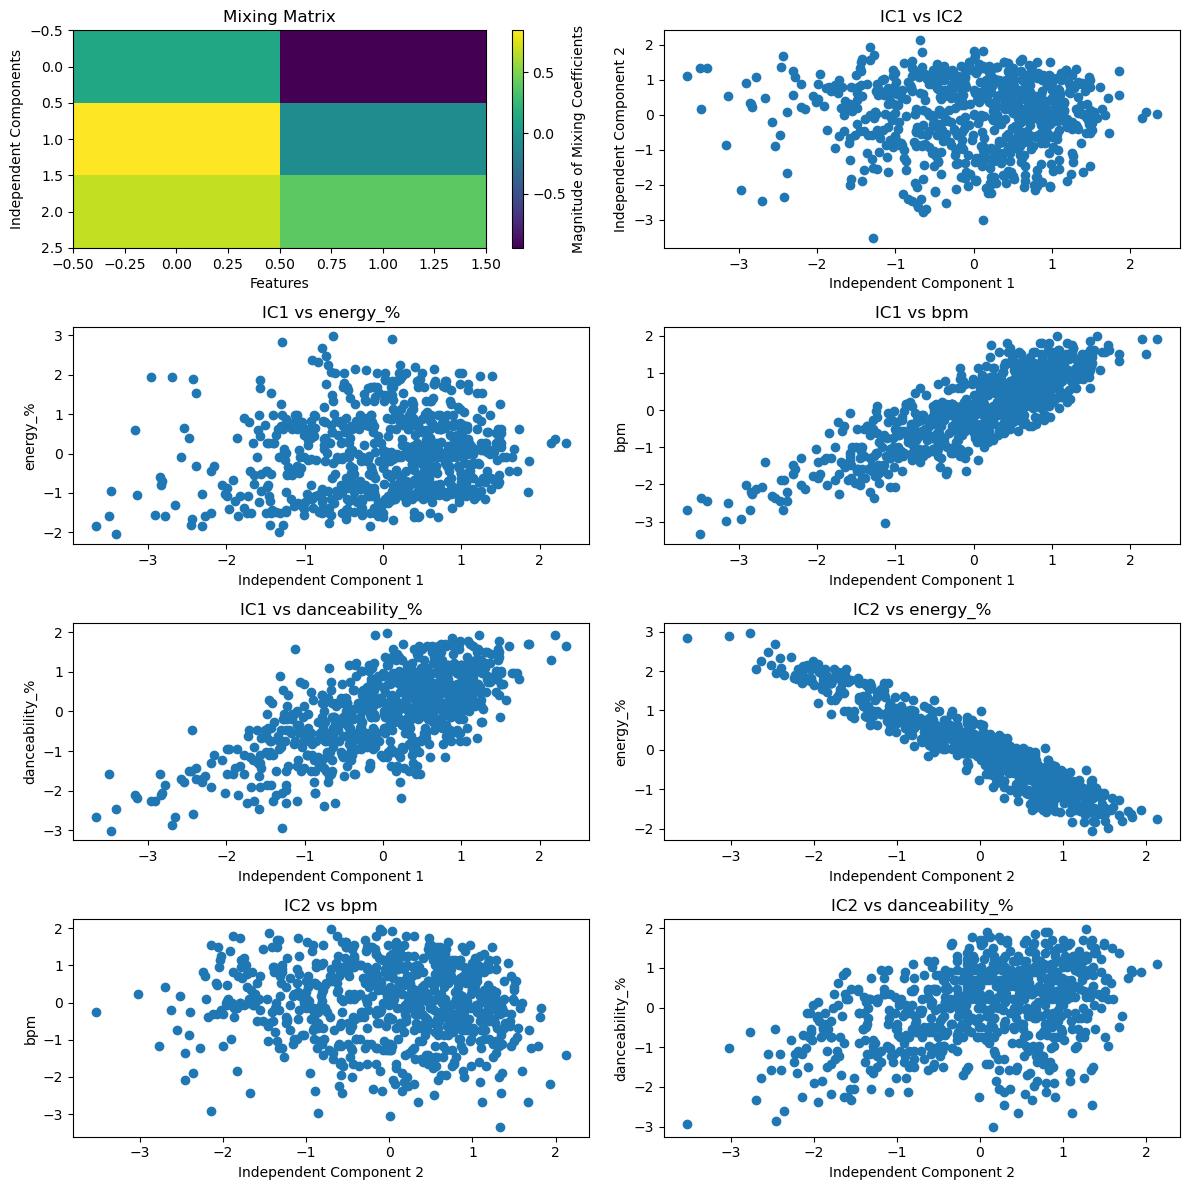

In [ ]:
#Create a 4 by 2 grid
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(4, 2, figure=fig)

#define subsplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#Add mixing matrix as the first plot
cax = ax0.imshow(spotify_ICA.mixing_, cmap='viridis', aspect='auto')
ax0.set_title('Mixing Matrix')
ax0.set_xlabel('Features')
ax0.set_ylabel('Independent Components')

#Add a color bar
cbar = fig.colorbar(cax, ax=ax0)
cbar.set_label('Magnitude of Mixing Coefficients')

#Add the IC1 vs IC2 plots for the second plot

ax1.scatter(independent_components[:, 0], independent_components[:, 1])
ax1.set_xlabel('Independent Component 1')
ax1.set_ylabel('Independent Component 2')
ax1.set_title('IC1 vs IC2')

#Define remaining plots for IC1 and IC2 vs features
features = ['energy_%', 'bpm','danceability_%']
for i, feature in enumerate(features):
    ax = fig.add_subplot(gs[(i+2) //2,(i+2) % 2])
    ax.scatter( independent_components[:, 0],spotify_ICA_train[:, i])
    ax.set_ylabel(feature)
    ax.set_xlabel('Independent Component 1')
    ax.set_title(f'IC1 vs {feature}')

    ax = fig.add_subplot(gs[(i+5)//2, (i+ 5) % 2])
    ax.scatter(independent_components[:, 1],spotify_ICA_train[:, i])
    ax.set_ylabel(feature)
    ax.set_xlabel('Independent Component 2')
    ax.set_title(f'IC2 vs {feature}')

plt.tight_layout()
plt.title('ICA Mixing Matrix and Independent Components for Spotify Data when Number of Components = 2') 
plt.show()